In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matrikasubedi","key":"a84a0fc56738f34df5e5a05dc85d333a"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:41<00:00, 63.3MB/s]
100% 2.29G/2.29G [00:41<00:00, 59.5MB/s]


In [5]:
from zipfile import ZipFile
file_name = "chest-xray-pneumonia.zip"

with ZipFile(file_name,'r') as zip:
 zip.extractall()
 print('Done')

Done


In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
import random
from random import randint
from pathlib import Path
import os


In [0]:
train_dir = "/content/chest_xray/chest_xray/train"
test_dir =  "/content/chest_xray/chest_xray/test"
X = []
Y = []

#Loop through the training and test folders, as well as the 'NORMAL' and 'PNEUMONIA' subfolders and append all images into array X.  Append the classification (0 or 1) into array Y.

for fileName in os.listdir(train_dir + "/NORMAL"): 
        img = cv2.imread(train_dir + "/NORMAL/" + fileName)
        if img is not None:
            Y.append(0)
            img = cv2.resize(img,(64,64))
            X.append(img)
    
for fileName in os.listdir(train_dir + "/PNEUMONIA"): 
        img = cv2.imread(train_dir + "/PNEUMONIA/" + fileName)
        if img is not None:
            Y.append(1)
            img = cv2.resize(img,(64,64))
            X.append(img)

for fileName in os.listdir(test_dir + "/NORMAL"): 
        img = cv2.imread(test_dir + "/NORMAL/" + fileName)
        if img is not None:
            Y.append(0)
            img = cv2.resize(img,(64,64))
            X.append(img)
    
for fileName in os.listdir(test_dir + "/PNEUMONIA"): 
        img = cv2.imread(test_dir + "/PNEUMONIA/" + fileName)
        if img is not None:
            Y.append(1)
            img = cv2.resize(img,(64,64))
            X.append(img)

This is an example of a patient X-ray who does not have pneumonia:


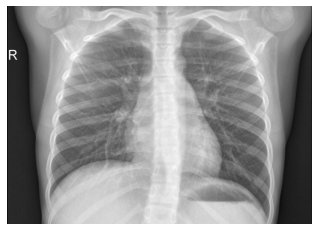

In [8]:
print("This is an example of a patient X-ray who does not have pneumonia:")
normal = cv2.imread(test_dir + "/NORMAL/IM-0003-0001.jpeg")
plt.axis('off')
plt.imshow(normal)

In [0]:
#from keras.utils.np_utils import to_categorical
#Y = to_categorical(Y, num_classes = 2) 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X),np.array(Y), test_size=0.2, random_state=42)


In [11]:

Y_train.shape

(4672,)

In [0]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Activation,Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Model configuration
batch_size = 50
no_epochs = 25
validation_split = 0.2
verbosity = 1
num_folds = 5

In [23]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, Y_test), axis=0)

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
   # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              validation_split=validation_split)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
75/75 [==============================] - 2s 24ms/step - loss: 7.1426 - accuracy: 0.7704 - val_loss: 0.2304 - val_accuracy: 0.9112
Epoch 2/25
75/75 [==============================] - 2s 22ms/step - loss: 0.2745 - accuracy: 0.8903 - val_loss: 0.2146 - val_accuracy: 0.9401
Epoch 3/25
75/75 [==============================] - 2s 22ms/step - loss: 0.2358 - accuracy: 0.9085 - val_loss: 0.1628 - val_accuracy: 0.9422
Epoch 4/25
75/75 [==============================] - 2s 22ms/step - loss: 0.2022 - accuracy: 0.9275 - val_loss: 0.1453 - val_accuracy: 0.9487
Epoch 5/25
75/75 [==============================] - 2s 22ms/step - loss: 0.2033 - accuracy: 0.9192 - val_loss: 0.1576 - val_accuracy: 0.9422
Epoch 6/25
75/75 [==============================] - 2s 22ms/step - loss: 0.1612 - accuracy: 0.9379 - val_loss: 0.1084 - val_accuracy: 0.9551
Epoch 7/25
75/75 [==============================] - 2s 22

In [24]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.10763366520404816 - Accuracy: 96.31849527359009%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.1012086421251297 - Accuracy: 96.5753436088562%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.03735018149018288 - Accuracy: 98.54452013969421%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.06237680837512016 - Accuracy: 98.2876718044281%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.06884763389825821 - Accuracy: 98.2876718044281%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 97.60274052619934 (+- 0.9518446140838648)
> Loss: 0.07548338621854782
--------------------------

In [0]:
#history=model.fit(X_train, Y_train, batch_size=30, epochs=15, validation_data=(X_test, Y_test), verbose=1)